## MACS30000 Assignment 5: Collaboration
### Leoson Hoay

**Importing necessary packages:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

----

## Kaggle open call projects:

*Explore the Kaggle competitions page, which maintains a list of open call projects. Describe one that is of interest to you. What is the goal of the competition? What would you have to do to make a submission?*

I am interested in the [Quora Question Pairs prediction competition](https://www.kaggle.com/c/quora-question-pairs), which aims to discover an optimal solution to identify duplicate/extremely similar questions posted on Quora, and offers $25,000 in prize money as compensation. The goal is to devise an improved method over their current Random Forest model, in order to minimize duplicate questions that result in a less ideal experience - seekers spending more time "finding the best answer to their question", and writers feeling that "they need to answer multiple versions of the same question". 

A submission consists of a CSV file mapping question sets in the testing set to a predicted probability value of duplicate-ness, based on a prediction model that I have to devise and train on the training set provided. In order to make the submission, I must first verify my Kaggle account via my mobile number, and also accept the terms and conditions of the competition. The submission is then evaluated based on the log loss between the predicted value and the ground truth.

*Explore the available datasets on the Kaggle datasets page. Download one of the datasets and generate a descriptive plot that highlights some instructive characteristic of the data. Make sure your plot has a title, labeled axes and axis titles, and a legend if necessary.* 

In [2]:
food_insp = pd.read_csv("data/Food_Inspections.csv")

*The dataset that I chose is a CSV data file which includes [facility inspections data]("https://www.kaggle.com/chicago/chi-restaurant-inspections) from restaurants in Chicago from 2013-2017. This data includes inspection date, pass/fail results, facility type, zip code, and other kinds of metadata.*

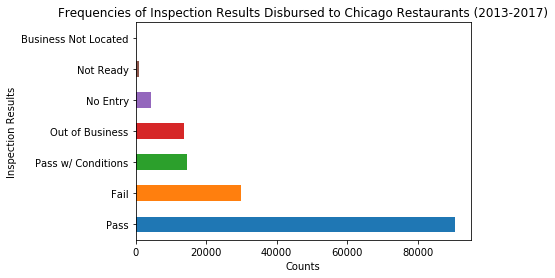

In [3]:
%matplotlib inline
fig, ax = plot.subplots()
ax.set_xlabel("Counts")
ax.set_ylabel("Inspection Results")
passes_plot = food_insp['Results'].value_counts().plot(ax=ax, kind='barh', title = "Frequencies of Inspection Results Disbursed to Chicago Restaurants (2013-2017)")

In [4]:
print(food_insp['Results'].value_counts())
90506 / len(food_insp['Results'])

Pass                    90506
Fail                    29845
Pass w/ Conditions      14530
Out of Business         13794
No Entry                 4257
Not Ready                 818
Business Not Located       60
Name: Results, dtype: int64


0.5884272804108965

The first plot displays the type of results awarded to restaurants in Chicago over the years 2013-2017 and their frequencies, which include the traditional Pass/Fail and other more exceptional categories. A simple calculation yields the fact that **a full 'Pass' grade has been given on approximately 58.8% of inspection attempts.**

In [5]:
#Extracting Year from the column of dates into new column
year_ls = []
for i in range(len(food_insp["Inspection Date"])):
    k = str(food_insp.iloc[i]["Inspection Date"])[-4:]
    year_ls.append(int(k))
food_insp["Year"] = year_ls

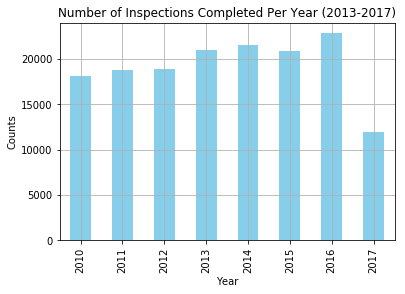

In [6]:
%matplotlib inline
fig, ax = plot.subplots()
ax.set_ylabel("Counts")
ax.set_xlabel("Year")
insp_lineplot = food_insp['Year'].value_counts().sort_index().plot(ax=ax, kind='bar', grid = True, color = 'skyblue', title = "Number of Inspections Completed Per Year (2013-2017)")

From the second plot, we can see that 2017 has the lowest inspection count, which is most likely due to the fact that the year has not yet ended. For the other years that precede it, there is an observable upward trend in the total number of inspections completed per year - although it is unclear whether the direct reason for this is an increase in the number of restaurants in the Chicago market, or an increase in range, scope, and frequency of the inspections conducted by the Food Protection Division of the Chicago Department of Public Health (CDPH), or both.

----

## Improving a journal article:

*Look through a recent issue of a journal in your field. Find a paper that you think could have been reformulated as a human computation project. How would you formulate the data collection as a human computation project? How might this improve the study?*

My article of choice is ["Assessing the effectiveness of a large database of emotion-eliciting films: A new tool for emotion researchers"]("http://www.tandfonline.com/doi/abs/10.1080/02699930903274322") by Schaefer et.al, 2010, published in the journal Cognition and Emotion. In this study, the authors aim to develop a database of films that will be useable by psychologists as stimuli in emotion studies. The idea is that films are one of the most commonly used stimuli in eliciting emotion, but validating which films are appropriate in eliciting particular emotions is of paramount importance for the comparability of such stimuli across different studies. Towards this end, the researchers recruited 50 film experts to review and identify emotional scenes from films, and 364 non-expert participants to assess these scenes' effects on their mood in a laboratory setting, using validated emotion scales.

I feel that human computation can improve this study in three main ways. First, in increasing the size of the sample and reducing the cost of participant recruitment; Second, in extending the effect validation beyond the laboratory setting; Third, in ensuring the continued expansion and validation of the database across multiple dimensions - time, language, etcetera.

The human computation model of this study will involve the recruitment of the participant movie raters through an online "Emotional Films" portal. This portal could be conceived as a gamified platform where participants are able to see how each film is being rated on an emotion scale after they have given their own rating. To boost participation, incentives such as a lucky draw or a token compensation (similar to the rates published on MTurk) that is relatively lower than that of traditional laboratory recruitment amounts. The participants will also be able to submit new movies for review, which will be considered for inclusion into the study. The study will then be administered over the website via the same delivery - where participants watch clips and fill in the emotions inventory in response to the clips. It is noted that since the delivery for these participants occur outside the laboratory setting, there is a certain amount of non-systematic error involved. However, through the large sample and data cleaning, it is possible to minimize this error. The project will also be as always-on as possible, allowing the database to continuously expand and keep updated with the fluctuations of time. 

The introduction of human computation will firstly allow for a large increase in the sample size beyond 364 participants, given the same amount of resources, thereby increasing the power and scope of the study. A potentially larger pool of film scenes will be able to be considered as well. Second, since most films in nature are viewed outside of the laboratory setting, and emotions are also felt on-the-fly, the emotional responses of individuals watching films from behind their own screens as opposed to a laboratory may arguably generate more accurate emotional classifications of the film scenes - although this is up for debate and needs to be investigated further. Third, the always-on and participatory nature of the project will allow the database to be updated as new films are created and older films become less salient in collective memory. Moreover, this also allows for the possibility for more films of different languages and cultures to be included (and possibly translated by willing participants), which may provide a valuable source of stimuli for culture-specific studies.

----

## InfluenzaNet

*Compare and contrast the design, costs, and likely errors in InfluenzaNet, Google Flu Trends, and traditional influenza tracking systems.*

The designs of the three systems are trained on data of differing natures. InfluenzaNet utilizes information provided directly from the population, where volunteers who are afflicted by influenza-like-illnesses (ILI) fill up an online questionnaire and weekly report where they state any occurring symptoms since their last physician visit. This is a survey methodology, with some semblance of ecological momentary assessment assuming that the weekly report is short and conveniently fillable. In contrast Google Flu Trends utilizes observational data readily available on the internet - specifically Google search data to build its estimations. Traditional methods utilize secondary observational data compiled by physicians on their patients. All three have their advantages - InfluenzaNet utilizes a volunteer network to obtain primary data from the sufferers themselves, while its online nature allows it to collect data from a wide range of geographical regions; Google Flu Trends is big data that is always-on, thus allowing for a constant data stream, and traditional methods are arguably highly reliable as they utilize experts in the profession to compile the data. 

In terms of costs, it is likely that Google Flu Trends costs the least to run, as it uses available search data online, although it depends on the amount of computing resources required to analyze the data. InfluenzaNet is also likely to be comparatively less expensive than traditional methods, since the former utilizes volunteers to provide the data. However, maintaining the web portal and compiling or cleaning the data probably requires a fair bit of resources as well - which is why I would rank it higher on the cost spectrum than Google Flu trends. Traditional methods would naturally require the greatest cost with regards to data collection, compilation, and maintaining the physician network.

InfluenzaNet's probable errors largely reside in the validity of the survey and self-report data. The survey's ILI standards are not the only standard around, and may not be the most applicable in all situations. Self-reports have inherent biases, of which the most salient one is the fact that these are sufferers reporting their own symptoms, as opposed to physicians prescribing a diagnosis, and self-reports are definitely not the most accurate in this case. 

Google Flu Trends is highly amenable to systematic errors due to its recommendation and search engine listing algorithms, and if these change may also result in algorithmic drift over time. This may result in an unstable model that is not always viable, as seen by its historical failures, and is difficult to work around due to the fact that the search engine is not actually being designed for research purposes.

Traditional influenza tracking systems suffer from two main problems - lag time and exclusion. Lag time occurs because the data is collected and compiled by physicians post-hoc, and these data must still be delivered to the relevant system researchers for analysis. Importantly, not all sufferers are willing or able to visit a physician to seek treatment, and some may not even recognize the necessity to do so. Hence, a large portion of the population - arguably the most volatile and critical data points (as they are not being treated and are still "out there") - will be excluded from the dataset.

*Consider an unsettled time, such as the swine flu outbreak. Describe the possible errors in each system.*

In the case of InfluenzaNet, because the data depends heavily on repeated reports from afflicted patients - patients may have varying reporting rates depending on the average prognosis period of swine flu. Assuming swine flu symptoms manifest themselves more strongly or severely as compared to the "average flu", volunteer participation may also take a dive due to some volunteers simply not having the ability or energy to participate in the survey. Also, in a related problem, the symptoms and prognosis of swine flu may not be as well-captured in the standardized ILI survey, since swine flu is usually detected by an in-person body fluid test.

In the case of Google Flu Trends, it faces the problem of possibly not detected a swine flu outbreak specifically, even if there might be a spike in searches related to "flu" in general. This is due to normal individuals not recognizing the distinctive symptoms and signs of swine flu before it has been diagnosed. On the converse end, a widely publicized outbreak will skew searches in the direction, and it is possible that systematic errors can result from Google's own algorithm - assuming that Google's search recommendations is tied to popular searches and current events, and thus suggest these terms to individuals performing a cursory search.

In the case of traditional tracking systems, it faces similar problems as it does on a normal basis, except that some of these problems may be exacerbated. Lag time, for example, may become a bigger issue as medical facilities become more and more overloaded during an outbreak, and have less time to make reports or make staggered reports. Also, the outbreak period will not be good time to be training a general statistical model. Finally, the problem of exclusion will also apply more strongly in the case of an outbreak, as there is likely to be an even greater population of sufferers that are unwilling or incapable of seeking treatment at traditional avenues.